In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import xarray as xr
import numpy as np
import os
from pprint import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy 
from datetime import datetime
import cmocean
import pandas as pd
import modules.basic_stats as bst
import modules.plotting_module as pltm
import intake
import xarray
import xesmf as xe
import cftime
from mpl_toolkits.axes_grid1 import make_axes_locatable

ModuleNotFoundError: No module named 'cmocean'

In [2]:
tas_p2 = xr.open_dataset('~/cmip6_final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_piControl_r1i1p2f1_gn_555001-560012.nc')
tas_coni_01 = xr.open_mfdataset('/space/hall3/sitestore/eccc/crd/ccrn/users/ncs001/ncs-coni-01/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-ncs-coni-01/piControl/r1i1p2f1/Amon/tas/gn/v20190429/*.nc')
tas_coni_02 = xr.open_mfdataset('/space/hall3/sitestore/eccc/crd/ccrn/users/ncs001/ncs-coni-02/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-ncs-coni-02/piControl/r1i1p2f1/Amon/tas/gn/v20190429/*.nc')


In [3]:
tas_jja_anom_coni_01 = tas_coni_01.groupby("time.season").mean(dim='time').sel(season='JJA')['tas'] - tas_p2.groupby("time.season").mean(dim='time').sel(season='JJA')['tas']
tas_jja_anom_coni_02 = tas_coni_02.groupby("time.season").mean(dim='time').sel(season='JJA')['tas'] - tas_p2.groupby("time.season").mean(dim='time').sel(season='JJA')['tas']

tas_djf_anom_coni_01 = tas_coni_01.groupby("time.season").mean(dim='time').sel(season='DJF')['tas'] - tas_p2.groupby("time.season").mean(dim='time').sel(season='DJF')['tas']
tas_djf_anom_coni_02 = tas_coni_02.groupby("time.season").mean(dim='time').sel(season='DJF')['tas'] - tas_p2.groupby("time.season").mean(dim='time').sel(season='DJF')['tas']

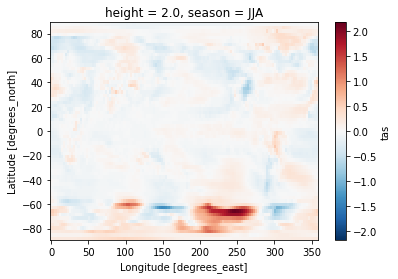

In [4]:
tas_jja_anom_coni_01.plot()

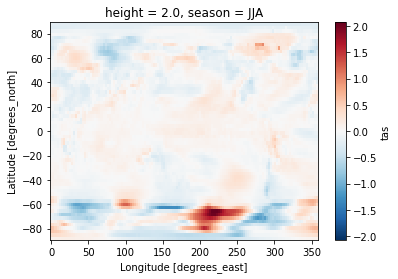

In [5]:
tas_jja_anom_coni_02.plot()

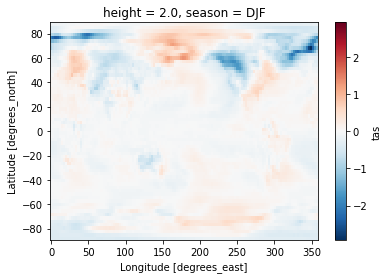

In [6]:
tas_djf_anom_coni_01.plot()

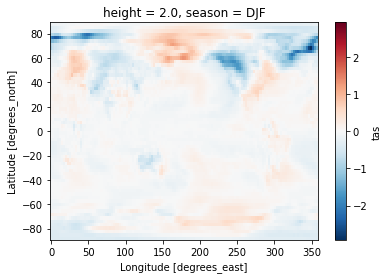

In [7]:
tas_djf_anom_coni_01.plot()

In [8]:
def add_cbar(position, fig, ax, co, size='5%', pad=0.075, **kwargs):
    """
    Adds a colorbar to an axes
    """
    divider = make_axes_locatable(ax)
    ax_cb = divider.append_axes(position, size=size, pad=pad, axes_class=plt.Axes)
    fig.add_axes(ax_cb)

    if position in ['top', 'bottom']:
        orientation='horizontal'
    if position in  ['right','left']:
        orientation='vertical'
    
    plt.colorbar(co, cax=ax_cb, orientation=orientation, **kwargs)

    if position == 'left':
        ax_cb.yaxis.set_ticks_position('left')
        ax_cb.yaxis.set_label_position('left')

In [9]:
title_fontsize=12

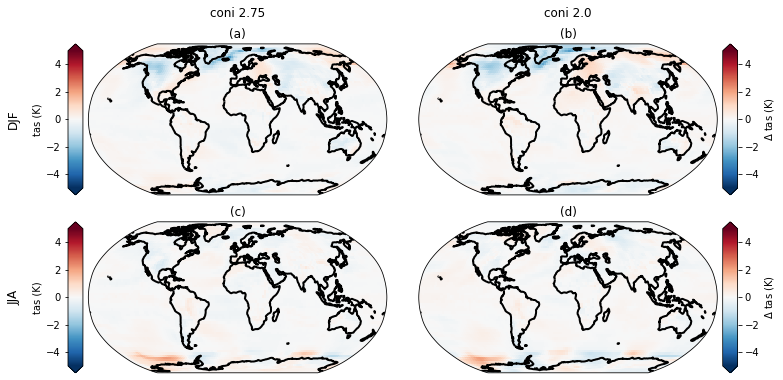

In [10]:
fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(tas_djf_anom_coni_01.lon, tas_djf_anom_coni_01.lat, tas_djf_anom_coni_01, cmap=cmap2,vmin=-5, vmax=5,
                        transform=ccrs.PlateCarree(), rasterized=True)
add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'tas (K)')
#ax1.contour(tas_djf_anom_coni_01.lon, tas_djf_anom_coni_01.lat, tas_djf_anom_coni_01, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'coni 2.75', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(tas_djf_anom_coni_02.lon, tas_djf_anom_coni_02.lat, tas_djf_anom_coni_02, 
                            cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
#ax3.contour(tas_djf_anom_coni_02.lon, tas_djf_anom_coni_02.lat, tas_djf_anom_coni_02,
#             10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'coni 2.0', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(tas_jja_anom_coni_01.lon, tas_jja_anom_coni_01.lat, tas_jja_anom_coni_01, 
                        cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True)
add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'tas (K)')
#ax2.contour(tas_jja_anom_coni_01.lon, tas_jja_anom_coni_01.lat, tas_jja_anom_coni_01,
#            10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(tas_jja_anom_coni_02.lon, tas_jja_anom_coni_02.lat, tas_jja_anom_coni_02,
                         cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
#ax4.contour(tas_jja_anom_coni_02.lon, tas_jja_anom_coni_02.lat, tas_jja_anom_coni_02,
#                     10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines(linewidth=2)

In [11]:
ls ~/cmip6_final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/SImon

siconc/  sisnconc/  sisnthick/  sitemptop/  sitimefrac/  siv/
simass/  sisnmass/  sispeed/    sithick/    siu/


In [12]:
source_id='CanESM5'
experiment_id=['historical', 'amip']
member_id='r1i1p2f1'
start = '1981-01-01'
end   = '2010-12-31'

# This is the location of the intake database
cat_url = "/home/scrd106/model_output/intake-catalogues/cccma_cmip6.json"
#cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"

# Location of the datasets used for the GMD figures. Should not need changing.
obs_data_path='/home/ncs001/site5/u1_data/canesm5-analysis/cmip6_gmd_figures'

In [13]:
def wrapper(ds):
    ds = ds.copy()
    #ds = rename_cmip6(ds)
    #ds = replace_x_y_nominal_lat_lon(ds)
    
    if ('longitude' in ds.dims) and ('latitude' in ds.dims):
        ds = ds.rename({'longitude':'lon', 'latitude': 'lat'}) # some models labelled dimensions differently...
    if ('bnds' in ds.dims): 
        ds=ds.drop_dims('bnds')
    if ('vertex' in ds.dims): 
        ds=ds.drop_dims('vertex')
    if ('height' in ds.dims): 
        ds=ds.drop_dims('height')
    if ('height' in ds): 
        ds=ds.drop_vars('height')
    return ds

In [14]:
col = intake.open_esm_datastore(cat_url)

query = dict(variable_id=['tas'], table_id='Amon', source_id=source_id, experiment_id=experiment_id, member_id=member_id)
cat = col.search(**query)

dset_dict = cat.to_dataset_dict(preprocess=wrapper)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [15]:
dset_dict.keys()

dict_keys(['CMIP.CCCma.CanESM5.amip.Amon.gn', 'CMIP.CCCma.CanESM5.historical.Amon.gn'])

In [16]:
for k in dset_dict.keys():
    if 'amip' in k:
        amip_ds = dset_dict[k].sel(time=slice(start, end)).squeeze()
    elif 'historical' in k:
        model_ds = dset_dict[k].sel(time=slice(start, end)).squeeze()

In [17]:
# Target grid to remap to. Here a standard 1x1 grid
ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 90, 1.0)),
                     'lon': (['lon'], np.arange(-180, 180, 1.0)),
                    }
                   )

In [18]:
regridder = xe.Regridder(model_ds, ds_out, 'bilinear', periodic=True)
model_ds_rm = regridder(model_ds)
amip_ds_rm = regridder(amip_ds)


/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [19]:
# Load and reamp ERA5 T2m to 1x1 global grid
ERA5_tas = 'era5_tas_monthlymean_1979-2019.nc'

ifile = [os.path.join(obs_data_path, 'input_data/obs/NEIL/era5/', ERA5_tas),        
         ]
era5_ds = xr.open_mfdataset(ifile).rename({'longitude':'lon', 'latitude':'lat', 't2m':'tas'}).sel(time=slice(start, end)).squeeze()

regridder = xe.Regridder(era5_ds, ds_out, 'bilinear', periodic=True)
era5_ds_rm = regridder(era5_ds)

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [44]:
#tas_obsanomaly = tas_mean - tas_obs_mean

model_DJF = pltm.get_seasonal(model_ds_rm,'noleap','DJF')
model_JJA = pltm.get_seasonal(model_ds_rm,'noleap','JJA')

amip_DJF = pltm.get_seasonal(amip_ds_rm,'noleap','DJF')
amip_JJA = pltm.get_seasonal(amip_ds_rm,'noleap','JJA')

era5_DJF = pltm.get_seasonal(era5_ds_rm,'standard','DJF')
era5_JJA = pltm.get_seasonal(era5_ds_rm,'standard','JJA')

seasonal_zms = {
    'tas_DJF':model_DJF.tas, 
    'tas_JJA':model_JJA.tas, 
    'tas_obs_DJF':era5_DJF.tas,
    'tas_obs_JJA':era5_JJA.tas,
    'tas_amip_DJF':amip_DJF.tas,
    'tas_amip_JJA':amip_JJA.tas,
    }   

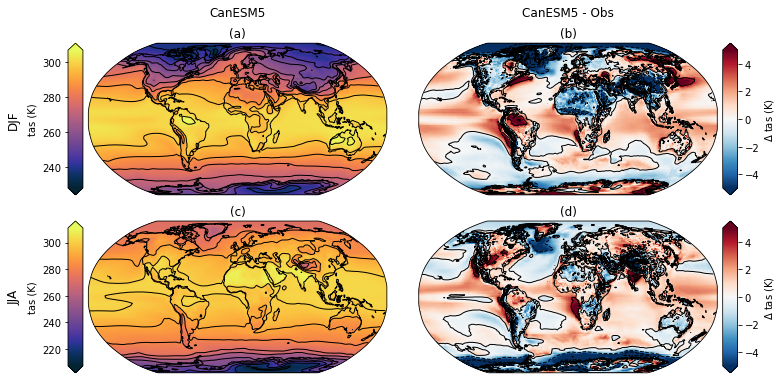

In [21]:
fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(seasonal_zms['tas_DJF'].lon, seasonal_zms['tas_DJF'].lat, seasonal_zms['tas_DJF'], 
                        cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'tas (K)')
ax1.contour(seasonal_zms['tas_DJF'].lon, seasonal_zms['tas_DJF'].lat, seasonal_zms['tas_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(seasonal_zms['tas_DJF'].lon, seasonal_zms['tas_DJF'].lat, seasonal_zms['tas_DJF'] - 
                          seasonal_zms['tas_obs_DJF'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
ax3.contour(seasonal_zms['tas_DJF'].lon, seasonal_zms['tas_DJF'].lat, seasonal_zms['tas_DJF'] - 
                          seasonal_zms['tas_obs_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(seasonal_zms['tas_JJA'].lon, seasonal_zms['tas_JJA'].lat, seasonal_zms['tas_JJA'], 
                        cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'tas (K)')
ax2.contour(seasonal_zms['tas_JJA'].lon, seasonal_zms['tas_JJA'].lat, seasonal_zms['tas_JJA'],
            10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(seasonal_zms['tas_JJA'].lon, seasonal_zms['tas_JJA'].lat, seasonal_zms['tas_JJA'] - 
                          seasonal_zms['tas_obs_JJA'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
ax4.contour(seasonal_zms['tas_JJA'].lon, seasonal_zms['tas_JJA'].lat, seasonal_zms['tas_JJA'] - 
                          seasonal_zms['tas_obs_JJA'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()

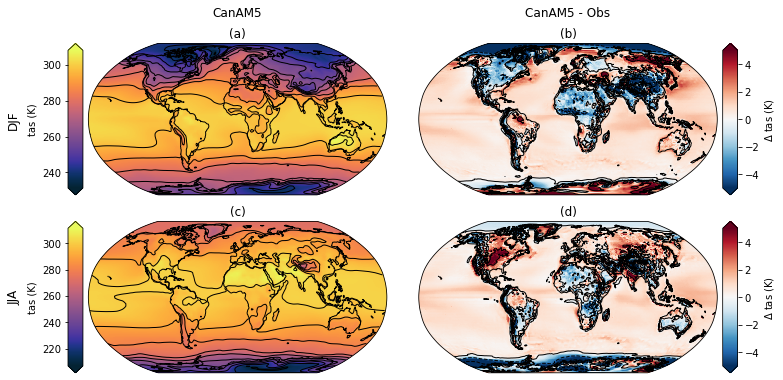

In [22]:
fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(seasonal_zms['tas_amip_DJF'].lon, seasonal_zms['tas_amip_DJF'].lat, seasonal_zms['tas_amip_DJF'], 
                        cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'tas (K)')
ax1.contour(seasonal_zms['tas_amip_DJF'].lon, seasonal_zms['tas_amip_DJF'].lat, seasonal_zms['tas_amip_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'CanAM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(seasonal_zms['tas_amip_DJF'].lon, seasonal_zms['tas_amip_DJF'].lat, seasonal_zms['tas_amip_DJF'] - 
                          seasonal_zms['tas_obs_DJF'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
ax3.contour(seasonal_zms['tas_amip_DJF'].lon, seasonal_zms['tas_amip_DJF'].lat, seasonal_zms['tas_amip_DJF'] - 
                          seasonal_zms['tas_obs_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'CanAM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(seasonal_zms['tas_amip_JJA'].lon, seasonal_zms['tas_amip_JJA'].lat, seasonal_zms['tas_amip_JJA'], 
                        cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'tas (K)')
ax2.contour(seasonal_zms['tas_amip_JJA'].lon, seasonal_zms['tas_amip_JJA'].lat, seasonal_zms['tas_amip_JJA'],
            10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(seasonal_zms['tas_amip_JJA'].lon, seasonal_zms['tas_amip_JJA'].lat, seasonal_zms['tas_amip_JJA'] - 
                          seasonal_zms['tas_obs_JJA'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
ax4.contour(seasonal_zms['tas_amip_JJA'].lon, seasonal_zms['tas_amip_JJA'].lat, seasonal_zms['tas_amip_JJA'] - 
                          seasonal_zms['tas_obs_JJA'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()
    ax.set_global()

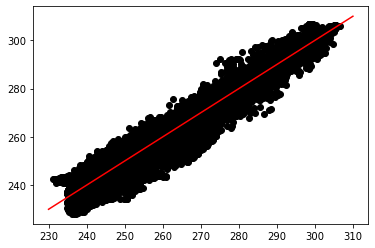

In [24]:
_ = plt.plot(seasonal_zms['tas_obs_DJF'], seasonal_zms['tas_DJF'], 'ko')
plt.plot([230,310], [230, 310], 'r-')

In [35]:
source_id='CanESM2'
experiment_id='historical'
member_id='r1i1p1'
start = '1981-01-01'
end   = '2005-12-31'

# This is the location of the intake database
cat_url = "/home/scrd106/model_output/intake-catalogues/cccma_cmip5.json"
#cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"

# Location of the datasets used for the GMD figures. Should not need changing.
obs_data_path='/home/ncs001/site5/u1_data/canesm5-analysis/cmip6_gmd_figures'

In [38]:
col = intake.open_esm_datastore(cat_url)

query = dict(variable=['tas'], model=source_id, experiment=experiment_id, ensemble_member=member_id, mip_table='Amon')
cat = col.search(**query)

dset_dict = cat.to_dataset_dict(preprocess=wrapper)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'institute.model.experiment.mip_table'


In [39]:
for k in dset_dict.keys():
    if 'amip' in k:
        amip_ds = dset_dict[k].sel(time=slice(start, end)).squeeze()
    elif 'historical' in k:
        model_ds = dset_dict[k].sel(time=slice(start, end)).squeeze()

In [40]:
regridder = xe.Regridder(model_ds, ds_out, 'bilinear', periodic=True)
canesm_ds_rm = regridder(model_ds)

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [45]:
canesm2_DJF = pltm.get_seasonal(model_ds_rm,'noleap','DJF')
canesm2_JJA = pltm.get_seasonal(model_ds_rm,'noleap','JJA')
seasonal_zms['tas_canesm2_DJF'] =  canesm2_DJF.tas 
seasonal_zms['tas_canesm2_JJA'] = canesm2_JJA.tas

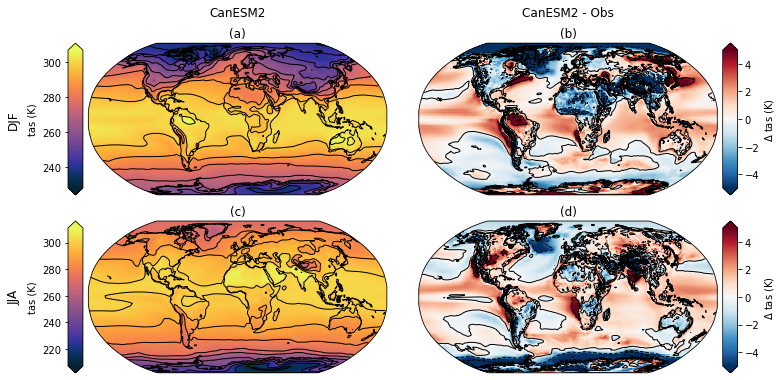

In [46]:
fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(seasonal_zms['tas_canesm2_DJF'].lon, seasonal_zms['tas_canesm2_DJF'].lat, seasonal_zms['tas_canesm2_DJF'], 
                        cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'tas (K)')
ax1.contour(seasonal_zms['tas_canesm2_DJF'].lon, seasonal_zms['tas_canesm2_DJF'].lat, seasonal_zms['tas_canesm2_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'CanESM2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(seasonal_zms['tas_canesm2_DJF'].lon, seasonal_zms['tas_canesm2_DJF'].lat, seasonal_zms['tas_canesm2_DJF'] - 
                          seasonal_zms['tas_obs_DJF'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
ax3.contour(seasonal_zms['tas_canesm2_DJF'].lon, seasonal_zms['tas_canesm2_DJF'].lat, seasonal_zms['tas_canesm2_DJF'] - 
                          seasonal_zms['tas_obs_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'CanESM2 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(seasonal_zms['tas_canesm2_JJA'].lon, seasonal_zms['tas_canesm2_JJA'].lat, seasonal_zms['tas_canesm2_JJA'], 
                        cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'tas (K)')
ax2.contour(seasonal_zms['tas_canesm2_JJA'].lon, seasonal_zms['tas_canesm2_JJA'].lat, seasonal_zms['tas_canesm2_JJA'],
            10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(seasonal_zms['tas_canesm2_JJA'].lon, seasonal_zms['tas_canesm2_JJA'].lat, seasonal_zms['tas_canesm2_JJA'] - 
                          seasonal_zms['tas_obs_JJA'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
ax4.contour(seasonal_zms['tas_canesm2_JJA'].lon, seasonal_zms['tas_canesm2_JJA'].lat, seasonal_zms['tas_canesm2_JJA'] - 
                          seasonal_zms['tas_obs_JJA'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()